In [390]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plot
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

input/heart.csv
input/o2Saturation.csv


In [391]:
o2saturation = pd.read_csv('input/o2Saturation.csv')
heart = pd.read_csv('input/heart.csv')

In [392]:
from sklearn.model_selection import train_test_split
y = heart.output
X = heart.drop("output", axis=1)

print(o2saturation)
best_accuracies = []
X_train, X_test, y_train, y_test = train_test_split(X,y)

      98.6
0     98.6
1     98.6
2     98.6
3     98.1
4     97.5
...    ...
3580  98.6
3581  98.6
3582  98.6
3583  98.6
3584  98.6

[3585 rows x 1 columns]


In [393]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=200)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=200)

In [394]:
y_model = model.predict(X_test)

In [395]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_model)

0.4342105263157895

/usr/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3.12/site-packages/sklearn/metrics/_classification.p

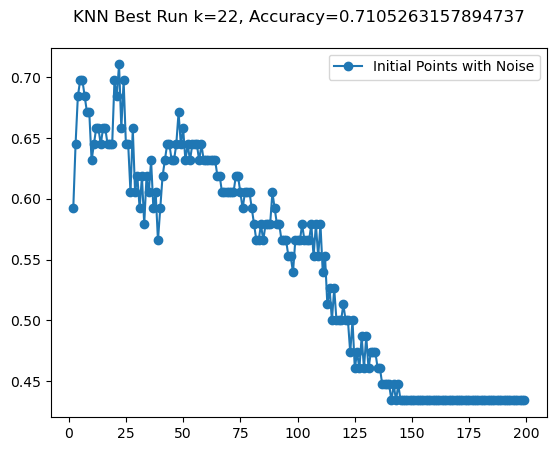

In [396]:
#TEST KNN: WHICH VALUE OF K PERFROMS BEST
import datetime
from sklearn.neighbors import KNeighborsClassifier

i = 2
accuracies = []

while i < 200:
    knnModel = KNeighborsClassifier(n_neighbors=i)
    knnModel.fit(X_train, y_train)
    predictions = knnModel.predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))
    classifReport = classification_report(y_test, predictions)
    confMatrix = confusion_matrix(y_test, predictions)
    # print(f"k={i}, Accuracy={accuracies[i-2]}\n")
    # print(classifReport)
    # print(confMatrix)
    i += 1

max_val = max(accuracies)
best_accuracies.append(max_val)
idx_max = accuracies.index(max_val)

plot.plot(range(2, 200), accuracies, "-", marker="o")
plot.title(f"KNN Best Run k={idx_max + 2}, Accuracy={max_val}\n")
plot.legend(["Initial Points with Noise"])
plot.savefig(f"outputs/knnpoints{datetime.datetime.now()}.png", format="png")
plot.show()

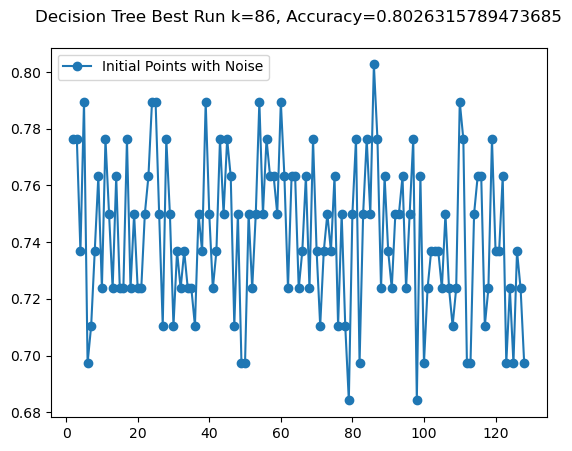

In [397]:
from sklearn.tree import DecisionTreeClassifier


i = 2
accuracies = []

while i < 129:
    knnModel = DecisionTreeClassifier(random_state=i)
    knnModel.fit(X_train, y_train)
    predictions = knnModel.predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))
    classifReport = classification_report(y_test, predictions)
    confMatrix = confusion_matrix(y_test, predictions)
    # print(f"k={i}, Accuracy={accuracies[i-2]}\n")
    # print(classifReport)
    # print(confMatrix)
    i += 1

max_val = max(accuracies)
best_accuracies.append(max_val)
idx_max = accuracies.index(max_val)

plot.plot(range(2, 129), accuracies, "-", marker="o")
plot.title(f"Decision Tree Best Run k={idx_max + 2}, Accuracy={max_val}\n")
plot.legend(["Initial Points with Noise"])
plot.savefig(f"outputs/dectreepoints{datetime.datetime.now()}.png", format="png")
plot.show()

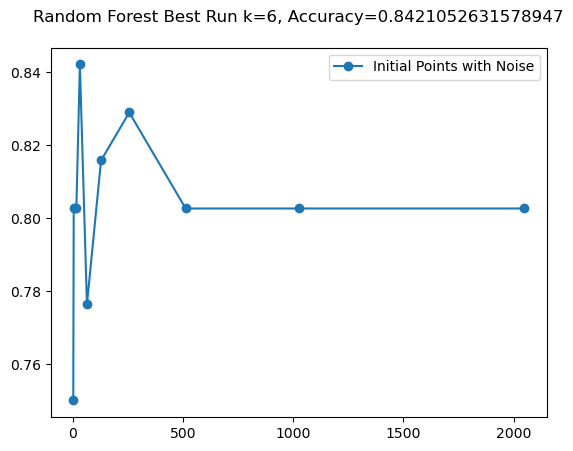

In [398]:
from sklearn.ensemble import RandomForestClassifier

i = 2
accuracies = []
iss = []
while i < 2049:
    knnModel = RandomForestClassifier(n_estimators=i)
    knnModel.fit(X_train, y_train)
    predictions = knnModel.predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))
    classifReport = classification_report(y_test, predictions)
    confMatrix = confusion_matrix(y_test, predictions)
    iss.append(i)
    i *= 2

max_val = max(accuracies)
best_accuracies.append(max_val)
idx_max = accuracies.index(max_val)

plot.plot(iss, accuracies, "-", marker="o")
plot.title(f"Random Forest Best Run k={idx_max + 2}, Accuracy={max_val}\n")
plot.legend(["Initial Points with Noise"])
plot.savefig(f"outputs/randomforestpoints{datetime.datetime.now()}.png", format="png")
plot.show()

/usr/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


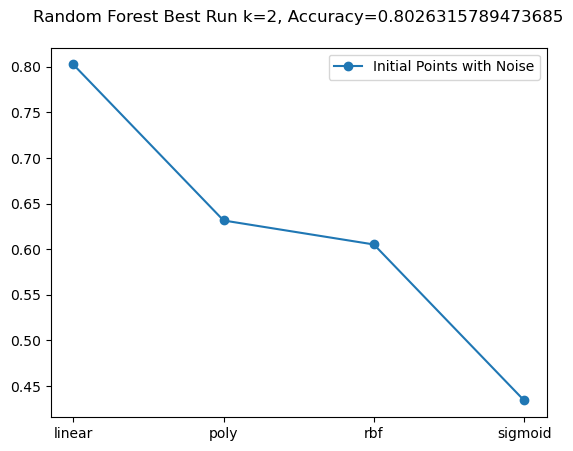

In [399]:
from sklearn.svm import SVC

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []

for i in kernels:
    knnModel = SVC(kernel = i)
    knnModel.fit(X_train, y_train)
    predictions = knnModel.predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))
    classifReport = classification_report(y_test, predictions)
    confMatrix = confusion_matrix(y_test, predictions)

max_val = max(accuracies)
best_accuracies.append(max_val)
idx_max = accuracies.index(max_val)

plot.plot(kernels, accuracies, "-", marker="o")
plot.title(f"Random Forest Best Run k={idx_max + 2}, Accuracy={max_val}\n")
plot.legend(["Initial Points with Noise"])
plot.savefig(f"outputs/svmpoints{datetime.datetime.now()}.png", format="png")
plot.show()
    

In [400]:
scores = []
names = []

#TEST KNN: Cross validation
knnModel = KNeighborsClassifier(n_neighbors=128)
scores.append(cross_val_score(knnModel, X, y, cv=10))
names.append("KNN")
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores[0].mean(), scores[0].std()))

0.63 accuracy with a standard deviation of 0.07


In [401]:
# TEST Tree: Cross 
model = DecisionTreeClassifier(max_depth=3)
scores.append(cross_val_score(model, X, y, cv=10))
names.append("Decision Tree")

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores[1].mean(), scores[1].std()))

0.81 accuracy with a standard deviation of 0.07


In [402]:
#TEST Forest: Cross validation
model = RandomForestClassifier(n_estimators=128, max_depth=2)
scores.append(cross_val_score(model, X, y, cv=10))
names.append("Random Forest")

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores[2].mean(), scores[2].std()))





0.84 accuracy with a standard deviation of 0.07


In [403]:
#TEST SVM: Cross validation
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)
scores.append(cross_val_score(model, X, y, cv=10))
names.append("SVM")

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores[3].mean(), scores[3].std()))

0.83 accuracy with a standard deviation of 0.07


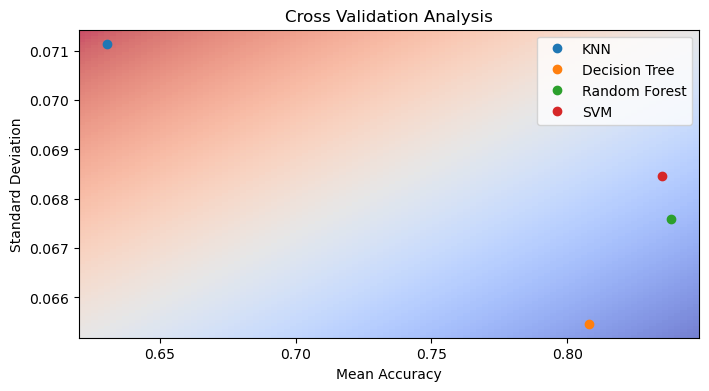

In [404]:
scores_mean = []
scores_std = []

for i in scores:
    scores_mean.append(i.mean())
    scores_std.append(i.std())


# Create the plot
fig, ax = plot.subplots(figsize=(8, 4))

# Create a gradient background
x = np.linspace(1, 0, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)
z = X + Y  # Create a gradient that increases along both axes

# Normalize Z to the range [0, 1]
z = (z - z.min()) / (z.max() - z.min())
for i in range(0,4):
    plot.plot(scores_mean[i], scores_std[i], "o")
# Set the background gradient
ax.imshow(z, aspect='auto', extent=ax.get_xlim() + ax.get_ylim(), origin='lower', cmap='coolwarm', alpha=0.7)

plot.title(f"Cross Validation Analysis")
plot.xlabel("Mean Accuracy")
plot.ylabel("Standard Deviation")
plot.legend(names)
plot.savefig(f"outputs/crossvalpoints{datetime.datetime.now()}.png", format="png")
plot.show()